### **Analyse and Visualise Global CO2 Emissions From 1900s till present.**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Global CO2 Emissions from fossil-fuels annually since 1751 till 2014. 
# Data Data comes from the Carbon Dioxide Information Analysis Center (CDIAC). 
# Data Source: https://datahub.io/core/co2-fossil-global

def fetchCSVDataSet():
  df = pd.read_csv('https://datahub.io/core/co2-fossil-global/r/global.csv')
  return df

In [38]:
# remove rows before 1900s

def cleanDataSet(df):
  df = df.drop(df[df.Year < 1900].index)
  # reset index to start at 0
  df = df.reset_index(drop=True)
  return df

In [39]:
def showAreaGraph(w, x, y, z, labels, legendLabels, color_map, titleText):
  sns.set_theme(style="darkgrid")
  plt.stackplot(w, x, y, z, labels=legendLabels, colors=color_map)  
  plt.xlabel(labels[0]) 
  plt.ylabel(labels[1])   
  plt.title(titleText) 
  plt.show()

In [40]:
def showLineChart(x, y, labels, title):
  sns.set_theme(style="darkgrid")
  sns.lineplot(x, y)
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.title(title)
  plt.show()

In [41]:
def showPieChart(values, labels, title):
  colors = sns.color_palette('pastel')[0:5]
  #create pie chart
  plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
  plt.title(title) 
  plt.show()

In [42]:
df = fetchCSVDataSet()
df = cleanDataSet(df)
df.head()

Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1900    534         3           16         515       0            0   
1  1901    552         4           18         531       0            0   
2  1902    566         4           19         543       0            0   
3  1903    617         4           20         593       0            0   
4  1904    624         4           23         597       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

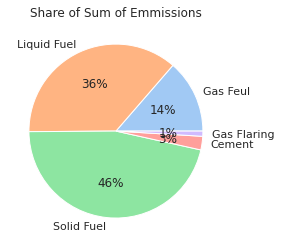

In [43]:
totalEmissions = [df['Gas Fuel'].sum(), df['Liquid Fuel'].sum(), df['Solid Fuel'].sum(), df['Cement'].sum(), df['Gas Flaring'].sum()]
labels = ['Gas Feul', 'Liquid Fuel', 'Solid Fuel', 'Cement', 'Gas Flaring']
showPieChart(totalEmissions, labels, 'Share of Sum of Emmissions')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


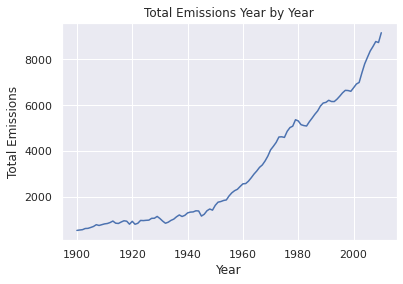

In [44]:
labels = ['Year', 'Total Emissions']
showLineChart(df['Year'], df['Total'], labels, 'Total Emissions Year by Year')

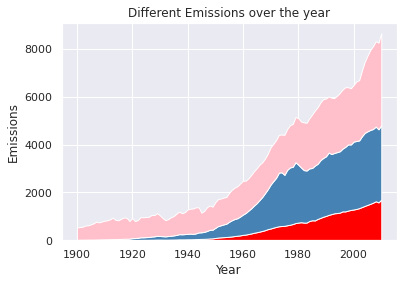

In [45]:
axislabels = ['Year', 'Emissions']
legendLabels = ['Gas Fuel', 'Liquid Fuel', 'Solid Fuel']
showAreaGraph(df['Year'], df['Gas Fuel'], df['Liquid Fuel'], df['Solid Fuel'], axislabels, legendLabels, ['red', 'steelblue', 'pink'], 'Different Emissions over the year')